ANÁLISE DE REGRESSÃO LOGÍSTICA
1) Determine o valor da desigualdade e a probabilidade estimada para os seguintes casos:
a) Z=0,5
b) Z=1
c) Z=0,1
d) Z=2


In [42]:
# Importação das bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [43]:
# Passo 1: Definir a função logística
def logistic_function(z):
    """Calcula a probabilidade usando a função logística."""
    return 1 / (1 + np.exp(-z))


In [44]:
# Passo 1: Definir a função logística
def logistic_function(z):
    """Calcula a probabilidade usando a função logística."""
    return 1 / (1 + np.exp(-z))

In [45]:
# Passo 1: Definir a função logística
def logistic_function(z):
    """
    Calcula a probabilidade usando a função logística.
    Parâmetros:
        z (float): Valor da desigualdade (Z).
    Retorno:
        float: Probabilidade calculada.
    """
    return 1 / (1 + np.exp(-z))

In [46]:
# Passo 2: Calcular as probabilidades para os valores de Z fornecidos
z_values = [0.5, 1, 0.1, 2]  # Valores de Z fornecidos no enunciado
probabilities = [logistic_function(z) for z in z_values]

In [47]:
# Exibir os resultados
print("Probabilidades calculadas para os valores de Z:")
for z, p in zip(z_values, probabilities):
    print(f"Z = {z}, Probabilidade = {p:.4f}")

Probabilidades calculadas para os valores de Z:
Z = 0.5, Probabilidade = 0.6225
Z = 1, Probabilidade = 0.7311
Z = 0.1, Probabilidade = 0.5250
Z = 2, Probabilidade = 0.8808


In [48]:
# Passo 3: Criar um conjunto de dados simulado
# Incluindo a variável qualitativa 'dmi' (presença/ausência)
np.random.seed(42)  # Para reprodutibilidade
df = pd.DataFrame({
    'X1': np.random.rand(100),  # Variável independente 1
    'X2': np.random.rand(100),  # Variável independente 2
    'dmi': np.random.choice([0, 1], size=100),  # Variável qualitativa (binária)
    'target': np.random.choice([0, 1], size=100)  # Variável dependente (binária)
})

In [49]:
# Passo 4: Dividir os dados em treino e teste
X = df[['X1', 'X2', 'dmi']]  # Variáveis independentes
y = df['target']  # Variável dependente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Passo 5: Ajustar o modelo de regressão logística
X_train_const = sm.add_constant(X_train)  # Adicionar constante para o intercepto
model = sm.Logit(y_train, X_train_const).fit()

Optimization terminated successfully.
         Current function value: 0.671345
         Iterations 4


In [51]:
# Exibir o resumo do modelo
print("\nResumo do Modelo de Regressão Logística:")
print(model.summary())


Resumo do Modelo de Regressão Logística:
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                   80
Model:                          Logit   Df Residuals:                       76
Method:                           MLE   Df Model:                            3
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:                 0.02038
Time:                        09:55:25   Log-Likelihood:                -53.708
converged:                       True   LL-Null:                       -54.825
Covariance Type:            nonrobust   LLR p-value:                    0.5251
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6717      0.660      1.017      0.309      -0.623       1.966
X1            -0.2254      0.791     -0.285      0.776      -1.775       1.324
X2        

In [52]:
# Passo 6: Fazer previsões no conjunto de teste
X_test_const = sm.add_constant(X_test)  # Adicionar constante ao conjunto de teste
y_pred = model.predict(X_test_const)

In [53]:
# Converter probabilidades em classes (0 ou 1) com base em um limiar de 0.5
y_pred_class = (y_pred > 0.5).astype(int)

In [54]:
# Passo 7: Calcular e exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_class)



In [55]:
# Exibir a matriz de confusão
print("\nMatriz de Confusão:")
print(conf_matrix)




Matriz de Confusão:
[[2 7]
 [2 9]]


KeyboardInterrupt: 

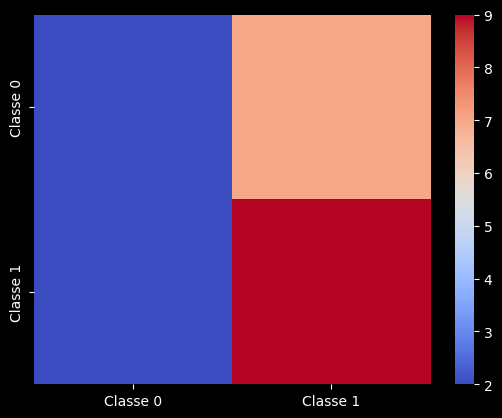

In [56]:
# Visualizar a matriz de confusão em dark mode
plt.style.use('dark_background')  # Ativar o tema dark mode
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão (Dark Mode)')
plt.show()



In [ ]:
# Passo 8: Calcular a curva ROC e a AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

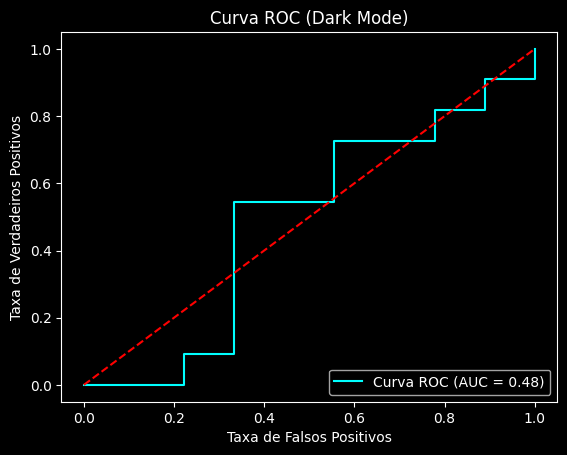

In [ ]:
# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='cyan', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC (Dark Mode)')
plt.legend(loc='lower right')
plt.style.use('dark_background')  # Tema dark mode
plt.show()

### Explicação do Código:

1. **Cálculo de Probabilidades:**

    • A função logística é usada para calcular as probabilidades para os valores de Z fornecidos no enunciado.

---

2. **Criação do Conjunto de Dados:**

    • Um conjunto de dados simulado é criado, incluindo a variável qualitativa `dmi` (presença/ausência) e outras variáveis independentes.

---

3. **Divisão dos Dados:**

    • Os dados são divididos em conjuntos de treino e teste usando `train_test_split`.

---

4. **Ajuste do Modelo:**

    • O modelo de regressão logística é ajustado usando `statsmodels`.

---

5. **Matriz de Confusão:**

    • A matriz de confusão é calculada e exibida como um gráfico de calor (heatmap) em dark mode.

---

6. **Curva ROC e AUC:**

    • A curva ROC é plotada para avaliar o desempenho do modelo, com a área sob a curva (AUC) exibida.